# Financial Econometrics - Homework 1

Dimitrios TERESSONOK - B00763957
Semen MANUSHKO - B00760363
William TAN - B00762546 
_______________________________________________________________

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
from scipy import stats
from scipy.stats import norm, ks_2samp
from pandas_datareader import data
from tqdm import tqdm

# Question 1

In [11]:
Ticker = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol']
Ticker = Ticker.str.replace(".",'-')
Ticker = pd.DataFrame(Ticker)

In [13]:
lll, mul, sig2l, skl, kul, corrsnp = [], [], [], [], [], []
start_date, end = '2001-01-01', '2020-01-01'
T = Ticker.shape[0]

SnP = data.DataReader('^GSPC', 'yahoo', start_date, end)
SnP['Log'] = np.log(SnP['Adj Close'])
Returns = np.diff(SnP['Log'])*100
Returns = np.append(0,Returns)
SnP['Returns'] = Returns

for i in tqdm(range(T)):
    extr = data.DataReader(Ticker.iloc[i][0], 'yahoo', start_date, end)
    extr['Log'] = np.log(extr['Adj Close'])
    Returns = np.diff(extr['Log'])*100
    Returns = np.append(0,Returns)
    extr['Returns'] = Returns
    analysis  =  stats.describe(extr['Returns'])
    if len(extr['Returns']) == len(SnP['Returns']):
        corrsnp.append(np.corrcoef(SnP['Returns'],extr['Returns'])[0][1])
    else:
        corrsnp.append(np.corrcoef(SnP['Returns'].iloc[len(SnP['Returns'])-len(extr['Returns']):], extr['Returns'])[0][1])
    lll.append(round((extr['Adj Close'][-1] / extr['Adj Close'][0] - 1) * 100, 2))
    mu, sig2, sk, ku = analysis[2:]
    mul.append(mu)
    sig2l.append(sig2)
    skl.append(sk)
    kul.append(ku)
    
Ticker['Mean'] = mul
Ticker['Variance'] = sig2l
Ticker['Skewness'] = skl
Ticker['Kurtosis'] = kul
Ticker['Total Returns'] = lll
Ticker['SnPCorr'] = corrsnp

100%|██████████| 505/505 [08:07<00:00,  1.20s/it]


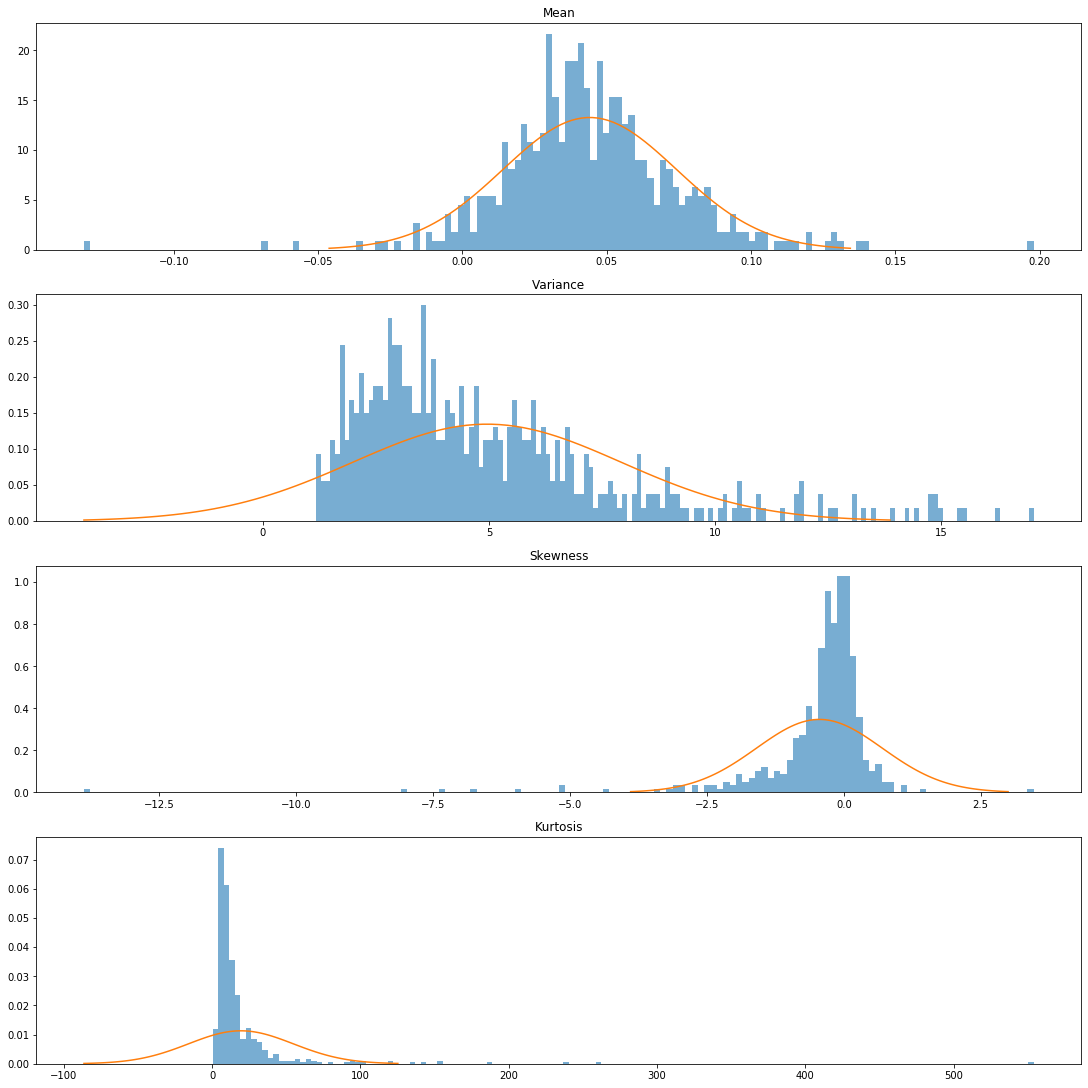

Average return: 0.0441 Average variance: 4.9572


In [14]:
get_info = ['Mean', 'Variance', 'Skewness', 'Kurtosis']
fig, ax = plt.subplots(nrows=len(get_info),constrained_layout=True,figsize=(15,15))

for i in range(len(get_info)):
    ax[i].hist(Ticker[get_info[i]], bins=150, density=True, alpha=0.6) 
    mu, sigma= Ticker[get_info[i]].mean(), Ticker[get_info[i]].std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax[i].plot(x, stats.norm.pdf(x, mu, sigma))
    ax[i].set_title(get_info[i])
    
plt.show()
print('Average return:',round(Ticker['Mean'].mean(), 4), 'Average variance:', round(Ticker['Variance'].mean(), 4))

<b><i>Comment</b></i><br>
Returns' distribution is close to the normal gaussian, although observed tails are fatter than implied my normal distribution and skewness is different from zero. Variance and Kurtosis obviously have assymetrical distribution because their values cannot be negative.

# Question 2

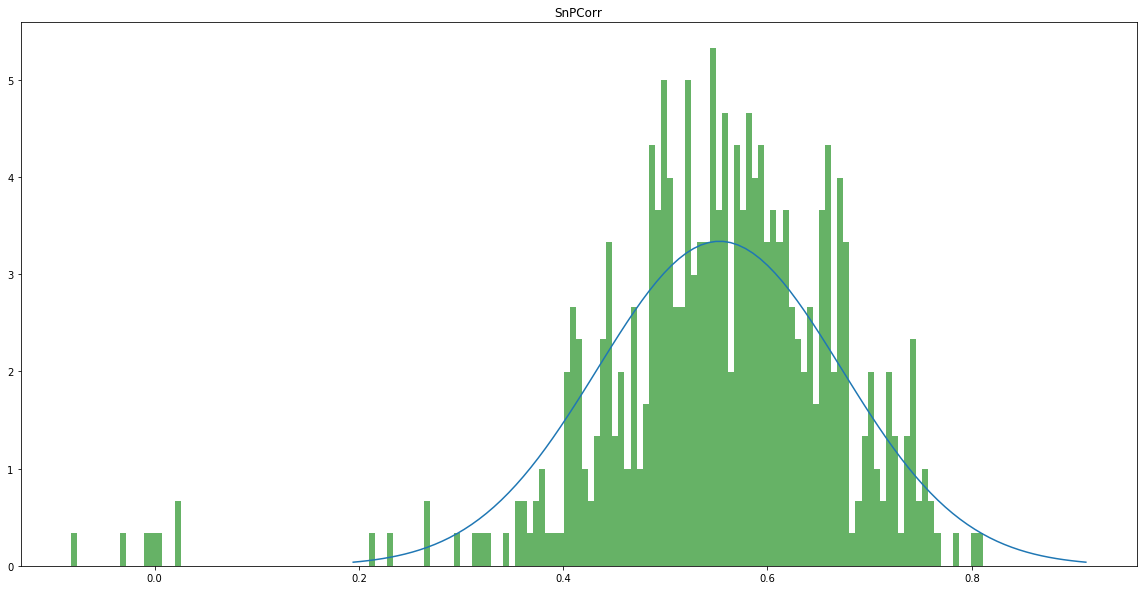

Average correlation: 0.553


In [15]:
get_info = 'SnPCorr'
plt.figure(figsize=(20,10))
plt.hist(Ticker[get_info], bins=150, density=True, alpha=0.6, color='g') 
mu = Ticker[get_info].mean()
sigma = Ticker[get_info].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title(get_info)
plt.show()
print('Average correlation:', round(mu, 4))

<b><i>Comment</b></i><br>
Nonparametric density estimates resemble normal distribution, however they're skewed to the left and have fat tails.

# Question 3

### 2001 to 2007

In [16]:
start_date_2007, end_2007 = '2001-01-01', '2008-01-01'
SnP_2007 = data.DataReader('^GSPC', 'yahoo', start_date_2007, end_2007)
SnP_2007['Log'] = np.log(SnP_2007['Adj Close'])
Returns_2007 = np.diff(SnP_2007['Log'])*100
Returns_2007 = np.append(0,Returns_2007)
SnP_2007['Returns'] = Returns_2007

In [17]:
data_2007 = []

for i in tqdm(range(T)):
    try:
        extr_2007 = data.DataReader(Ticker.iloc[i][0], 'yahoo', start_date_2007, end_2007)
    except Exception:
        pass
    else:
        data_row = []
        data_row.append(Ticker.iloc[i][0])
        extr_2007['Log'] = np.log(extr_2007['Adj Close'])
        Returns_2007 = np.diff(extr_2007['Log'])*100
        Returns_2007 = np.append(0,Returns_2007)
        extr_2007['Returns'] = Returns_2007
        analysis_2007  =  stats.describe(extr_2007['Returns'])        
        mu, sig2, sk, ku = analysis_2007[2:]
        data_row.append(mu)
        data_row.append(sig2)
        data_row.append(sk)
        data_row.append(ku)
        data_row.append(round((extr_2007['Adj Close'][-1] / extr_2007['Adj Close'][0] - 1) * 100, 2))
        
        if len(extr_2007['Returns']) == len(SnP_2007['Returns']):
            data_row.append(np.corrcoef(SnP_2007['Returns'],extr_2007['Returns'])[0][1])
        else:
            data_row.append(np.corrcoef(SnP_2007['Returns'].iloc[len(SnP_2007['Returns'])-len(extr_2007['Returns']):],
                                        extr_2007['Returns'])[0][1])
        
        data_2007.append(data_row)
        
Ticker_2007 = pd.DataFrame(data_2007,
                           columns=['Symbol','Mean','Variance','Skewness','Kurtosis','Annual Returns','SnPCorr'])

100%|██████████| 505/505 [08:16<00:00,  1.05it/s]


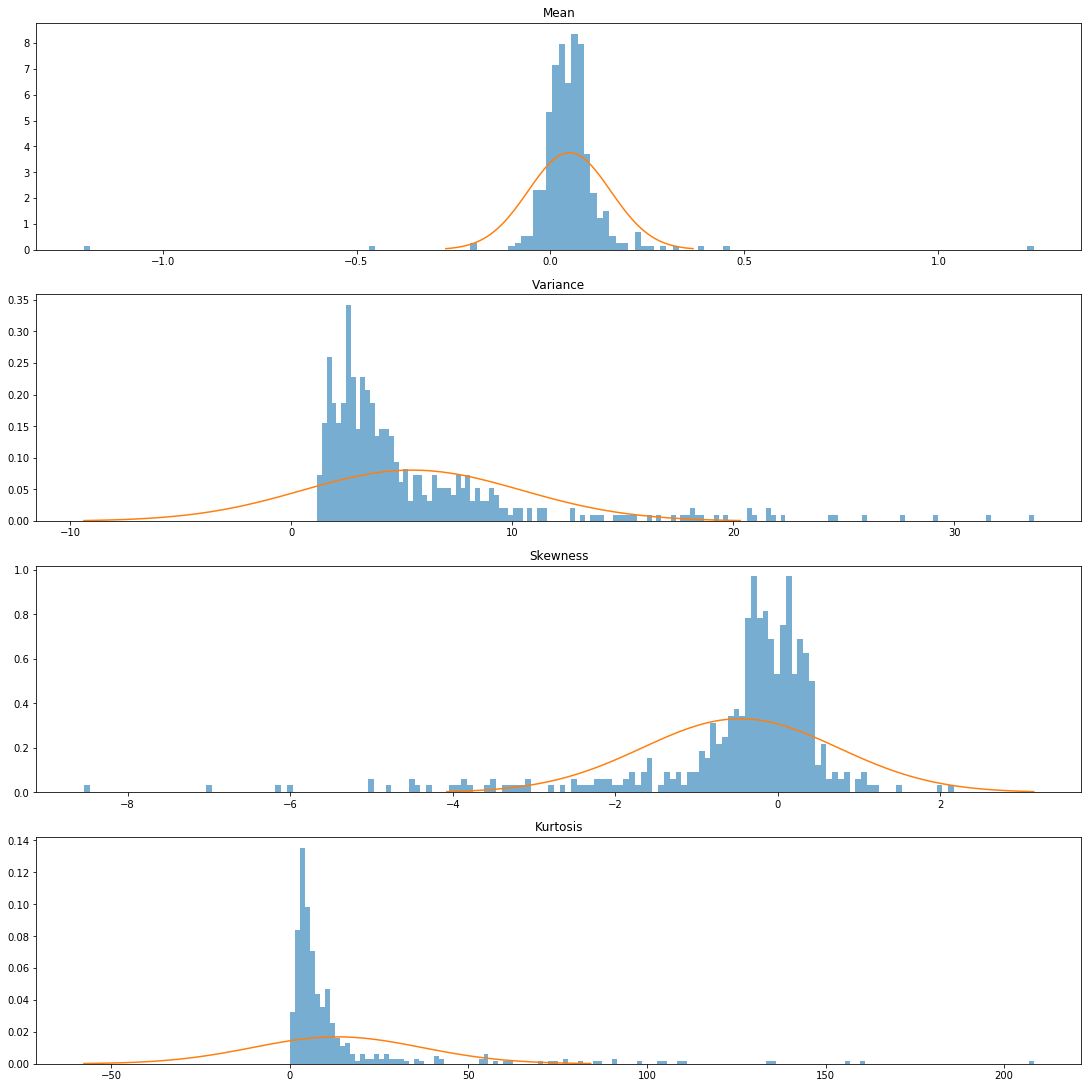

Average return: 0.0487 Average variance: 5.4742


In [18]:
get_info = ['Mean', 'Variance', 'Skewness', 'Kurtosis']
fig, ax = plt.subplots(nrows=len(get_info),constrained_layout=True,figsize=(15,15))

for i in range(len(get_info)):
    ax[i].hist(Ticker_2007[get_info[i]], bins=150, density=True, alpha=0.6) 
    mu, sigma= Ticker_2007[get_info[i]].mean(), Ticker_2007[get_info[i]].std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax[i].plot(x, stats.norm.pdf(x, mu, sigma))
    ax[i].set_title(get_info[i])
plt.show()
print('Average return:',round(Ticker_2007['Mean'].mean(), 4), 'Average variance:', round(Ticker_2007['Variance'].mean(), 4))

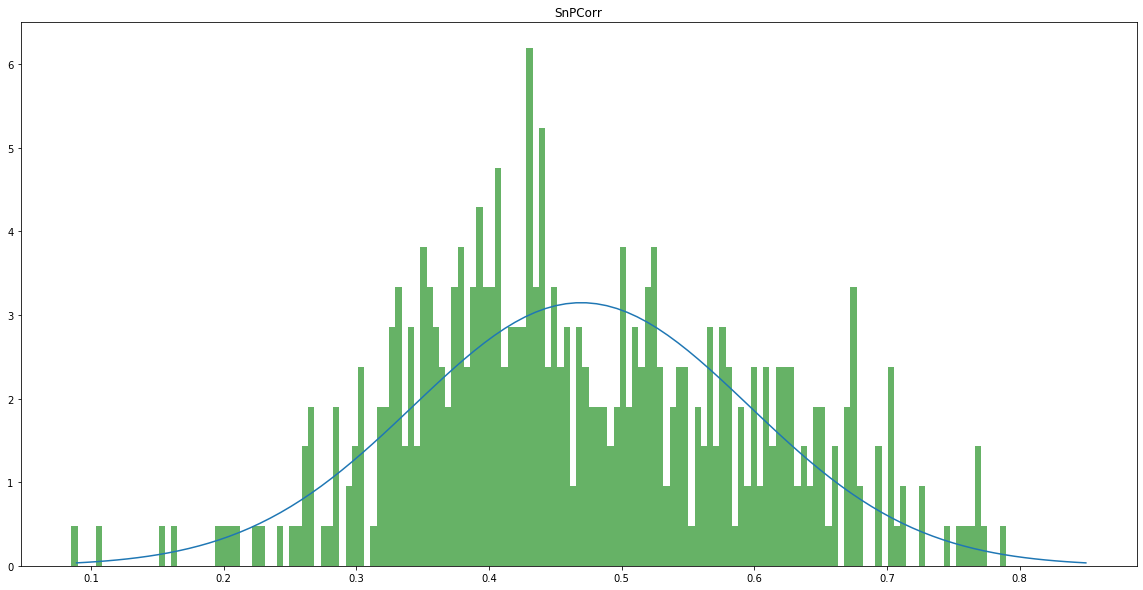

Average correlation: 0.4695


In [19]:
get_info = 'SnPCorr'
plt.figure(figsize=(20,10))
plt.hist(Ticker_2007[get_info], bins=150, density=True, alpha=0.6, color='g') 
mu = Ticker_2007[get_info].mean()
sigma = Ticker_2007[get_info].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title(get_info)
plt.show()
print('Average correlation:', round(mu, 4))

<i><b>Comment</b></i><br>
Over the period 2001-2007 average daily return was 4.9% and the average correlation struck at 47%. Returns' distribution is still close to the normal gaussian, although observed tails are fatter than implied my normal distribution and skewness is different from zero. Variance and Kurtosis obviously have assymetrical distribution because their values cannot be negative.

### 2009 to 2020

In [20]:
start_date_2009, end_2009 = '2009-01-01', '2020-01-01'
SnP_2009 = data.DataReader('^GSPC', 'yahoo', start_date_2009, end_2009)
SnP_2009['Log'] = np.log(SnP_2009['Adj Close'])
Returns_2009 = np.diff(SnP_2009['Log'])*100
Returns_2009 = np.append(0,Returns_2009)
SnP_2009['Returns'] = Returns_2009

In [21]:
data_2009 = []


for i in tqdm(range(T)):
    try:
        extr_2009 = data.DataReader(Ticker.iloc[i][0], 'yahoo', start_date_2009, end_2009)
    except Exception:
        pass
    else:
        data_row = []
        data_row.append(Ticker.iloc[i][0])
        extr_2009['Log'] = np.log(extr_2009['Adj Close'])
        Returns_2009 = np.diff(extr_2009['Log'])*100
        Returns_2009 = np.append(0,Returns_2009)
        extr_2009['Returns'] = Returns_2009
        analysis_2009  =  stats.describe(extr_2009['Returns'])
        
        mu, sig2, sk, ku = analysis_2009[2:]
        data_row.append(mu)
        data_row.append(sig2)
        data_row.append(sk)
        data_row.append(ku)
        data_row.append(round((extr_2009['Adj Close'][-1] / extr_2009['Adj Close'][0] - 1) * 100, 2))
        
        if len(extr_2009['Returns']) == len(SnP_2009['Returns']):
            data_row.append(np.corrcoef(SnP_2009['Returns'],extr_2009['Returns'])[0][1])
        else:
            data_row.append(np.corrcoef(SnP_2009['Returns'].iloc[len(SnP_2009['Returns'])-len(extr_2009['Returns']):],
                                        extr_2009['Returns'])[0][1])
        
        data_2009.append(data_row)
        
Ticker_2009 = pd.DataFrame(data_2009,
                           columns=['Symbol','Mean','Variance','Skewness','Kurtosis','Annual Returns','SnPCorr'])

100%|██████████| 505/505 [10:05<00:00,  1.26s/it]


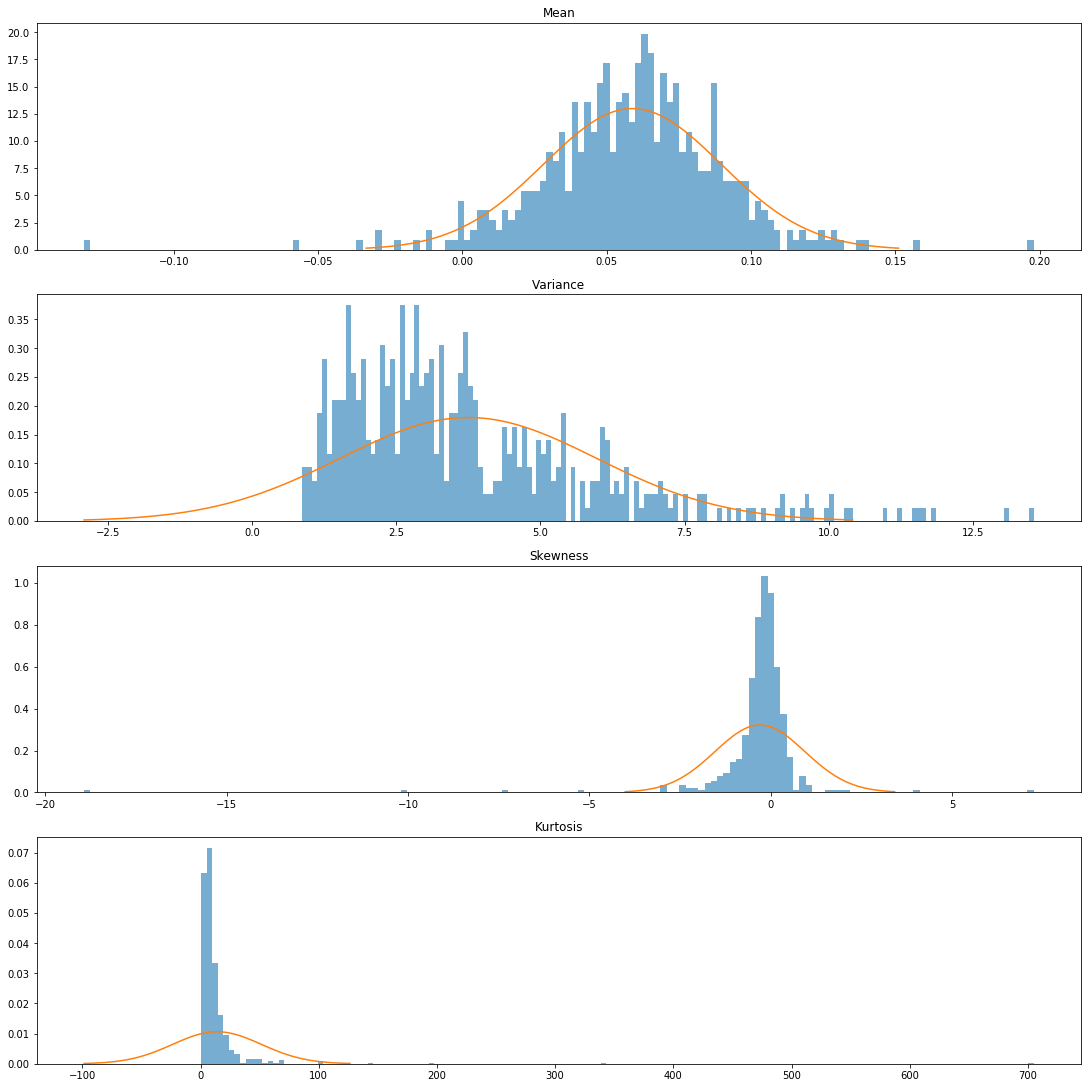

Average return: 0.0589 Average variance: 3.7515


In [22]:
get_info = ['Mean', 'Variance', 'Skewness', 'Kurtosis']
fig, ax = plt.subplots(nrows=len(get_info),constrained_layout=True,figsize=(15,15))

for i in range(len(get_info)):
    ax[i].hist(Ticker_2009[get_info[i]], bins=150, density=True, alpha=0.6) 
    mu, sigma= Ticker_2009[get_info[i]].mean(), Ticker_2009[get_info[i]].std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax[i].plot(x, stats.norm.pdf(x, mu, sigma))
    ax[i].set_title(get_info[i])
plt.show()
print('Average return:', round(Ticker_2009['Mean'].mean(), 4), 'Average variance:', round(Ticker_2009['Variance'].mean(), 4))

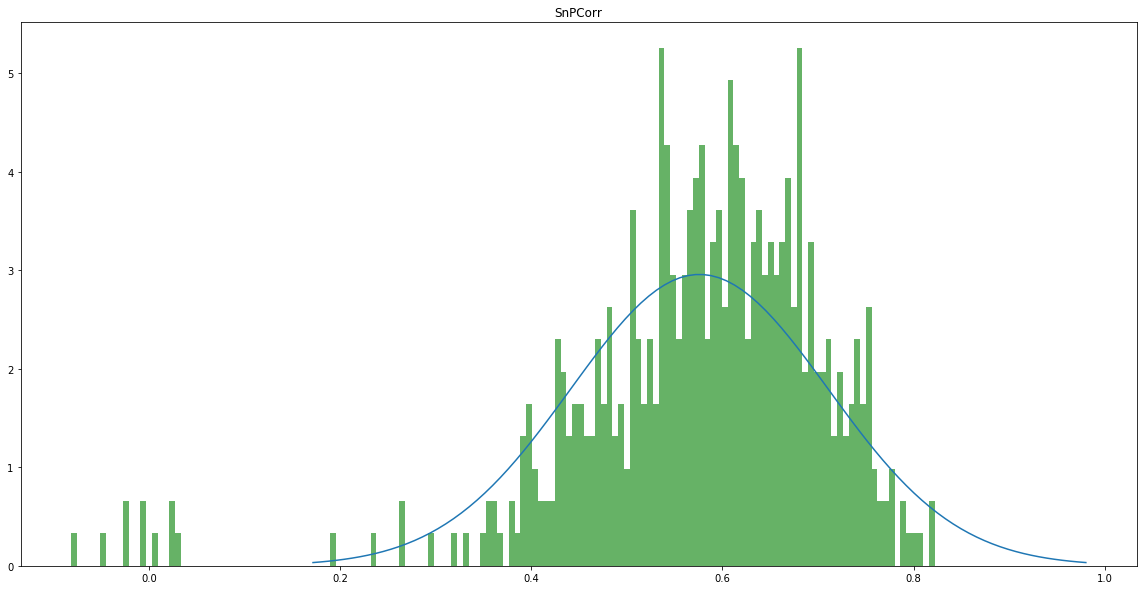

Average correlation: 0.5759


In [23]:
get_info = 'SnPCorr'
plt.figure(figsize=(20,10))
plt.hist(Ticker_2009[get_info], bins=150, density=True, alpha=0.6, color='g') 
mu = Ticker_2009[get_info].mean()
sigma = Ticker_2009[get_info].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title(get_info)
plt.show()
print('Average correlation:', round(mu, 4))

<i><b>Comment</b></i><br>
Over the period 2009-2020 average daily return was 5.9% and the average correlation soared to 57 mainly due to the rise in ETFs. Returns' distribution now is even closer to the normal gaussian, although observed tails are fatter than implied my normal distribution and skewness is different from zero. Variance and Kurtosis obviously have assymetrical distribution because their values cannot be negative.

# Question 4

In [24]:
col_to_compare = ['Mean','Variance','Skewness','Kurtosis','Annual Returns','SnPCorr']
kolmogorov_list = []

for colname in col_to_compare:
    ks_row = []
    ks_row.append(ks_2samp(Ticker_2009[colname], Ticker_2007[colname])[0])
    ks_row.append(ks_2samp(Ticker_2009[colname], Ticker_2007[colname])[1])
    kolmogorov_list.append(ks_row)

In [25]:
pd.DataFrame(kolmogorov_list, index = col_to_compare, columns = ['KS-statistics', 'KS p-value'])

,KS-statistics,KS p-value
Mean,0.240415,1.574074e-12
Variance,0.157308,1.339932e-05
Skewness,0.084781,6.130726e-02
Kurtosis,0.164002,4.770155e-06
Annual Returns,0.419324,0.000000e+00
SnPCorr,0.414304,0.000000e+00


<i><b>Comment</b></i><br>
Considering that p-values are all less than 1%, we can safely reject the null hypothesis and assume that the distributions of the returns, moments and SnP correlations have been affected by the financial crysis.

# Question 5

In [26]:
lll, mul, sig2l, skl, kul, corrsnp = [], [], [], [], [], []
start_date, end = '2019-01-01', '2020-01-01'
T = Ticker.shape[0]

SnP = data.DataReader('^GSPC', 'yahoo', start_date, end)
SnP['Log'] = np.log(SnP['Adj Close'])
Returns = np.diff(SnP['Log'])*100
Returns = np.append(0,Returns)
SnP['Returns'] = Returns

for i in tqdm(range(T)):
    extr = data.DataReader(Ticker.iloc[i][0], 'yahoo', start_date, end)
    extr['Log'] = np.log(extr['Adj Close'])
    Returns = np.diff(extr['Log'])*100
    Returns = np.append(0,Returns)
    extr['Returns'] = Returns
    analysis  =  stats.describe(extr['Returns'])
    if len(extr['Returns']) == len(SnP['Returns']):
        corrsnp.append(np.corrcoef(SnP['Returns'],extr['Returns'])[0][1])
    else:
        corrsnp.append(np.corrcoef(SnP['Returns'].iloc[len(SnP['Returns'])-len(extr['Returns']):], extr['Returns'])[0][1])
    lll.append(round((extr['Adj Close'][-1] / extr['Adj Close'][0] - 1) * 100, 2))
    mu, sig2, sk, ku = analysis[2:]
    mul.append(mu)
    sig2l.append(sig2)
    skl.append(sk)
    kul.append(ku)
    
Ticker['Mean'] = mul
Ticker['Variance'] = sig2l
Ticker['Skewness'] = skl
Ticker['Kurtosis'] = kul
Ticker['Annual Returns'] = lll
Ticker['SnPCorr'] = corrsnp

print('\n S&P 500 Return: ')
print(round((SnP['Adj Close'][-1] / SnP['Adj Close'][0] - 1) * 100, 2))
print('Top 10 Companies:')
print(Ticker.sort_values(by=['Annual Returns'], ascending=False).head(10)[['Symbol', 'Annual Returns']])
print('\nBottom 10 Stocks:')
print(Ticker.sort_values(by=['Annual Returns'], ascending=False).tail(10)[['Symbol', 'Annual Returns']])

100%|██████████| 505/505 [06:50<00:00,  1.35it/s]


 S&P 500 Return: 
28.71
Top 10 Companies:
    Symbol  Annual Returns
7      AMD          143.55
367   PAYC          121.19
286   LRCX          115.96
279   KLAC          100.80
438    TGT           99.12
290   LDOS           91.25
129   CPRT           90.73
391   QRVO           89.98
104    CMG           88.81
48    AAPL           88.74

Bottom 10 Stocks:
    Symbol  Annual Returns
83     COG          -24.75
330    MOS          -25.20
21     ADS          -26.42
283     LB          -27.00
333    MYL          -28.01
208    GPS          -28.08
358    OXY          -29.00
161    DXC          -29.65
302      M          -40.16
3     ABMD          -44.96
